
<img src="https://img.kaikeba.com/web/hcTech/img_logo.png" alt="图片替换文本" width="500" height="150" align="bottom" />

# 1 Foundation of Artificial Intelligence.Lecture 2
## 目录

- Linear Regression
- Loss Function
- Gradient Descent
- Activation Function
- Logistic Regression
- Overfitting and Underfitting
- Bias and Variance
- Regularlization
- Optimizer方法、Adam等优化方法


# 2 Fit A Line

![](./Linear_Regression.png)

In [88]:
import numpy as np
import matplotlib.pyplot as plt

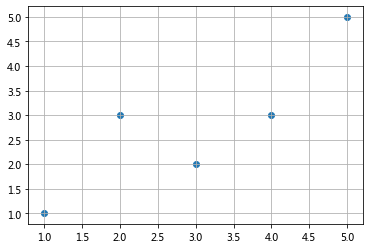

In [30]:
x = np.array([1., 2. ,3. ,4. ,5.])
y = np.array([1., 3. ,2. ,3. ,5.])
plt.scatter(x,y) # 绘制 x 与 y
plt.grid() # 显示网格

问题1：已知两个点（1.0，1.0）与（5.0，5.0），求解二元一次方程？    
问题2：对于上面的五个点，可以用一条直线表示吗？    

<img src="https://img-blog.csdnimg.cn/20200410205259492.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="500" height="500" align="bottom" />

![在这里插入图片描述](https://img-blog.csdnimg.cn/2020041107263822.gif)

## 2.1 损失函数(Loss Function)

- 平均绝对误差（Mean Absolute Error，MAE）

若有$m$个数据，第$i$个数据下的真实值表示为$y^i$,拟合曲线在第个值下的值为 $ \hat{ y^i}$, MAE表示为：

$$ MAE = \frac 1m\sum_{i=1}^m | \hat {y^i} - y^i | $$

- 均方误差（Mean Squared Error，MSE）

同样，考虑到拟合直线与真实值的面积误差，表达式如下：

$$ MSE = \frac {1}{2m}\sum_{i=1}^m ( \hat {y^i} - y^i )^2 $$


In [19]:
def loss(y, y_hat):
    """
    :param y: the real fares
    :param y_hat: the estimated fares
    :return: how good is the estimated fares
    """

    return np.mean(np.abs(y_hat - y))
    # return np.mean(np.square(y_hat - y))
    # return np.mean(np.sqrt(y_hat - y))

In [20]:
def loss(y, y_hat):
    return sum(abs(y_hat_i - y_i) for y_hat_i, y_i in zip(list(y_hat),list(y))) / len(list(y_hat))

In [29]:
def function (x, k, b):
    """y = kx + b"""
    return x*k + b

### 2.1.1 方法1，遍历求解

k:[-1,1] 步长：0.1   
b:[-1,1] 步长：0.1   

In [43]:
k_1 = np.linspace(-1,1,20)

In [23]:
for k in range(-10, 11):
    k *= 0.1
    print(k)

-1.0
-0.9
-0.8
-0.7000000000000001
-0.6000000000000001
-0.5
-0.4
-0.30000000000000004
-0.2
-0.1
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


In [31]:
print(y)

[1. 3. 2. 3. 5.]


In [45]:
for k in range(-100, 101):
    k *= 0.01
    for b in range(-100,101):
        b *= 0.01
        y_hat = [function(x_i,k,b) for x_i in list(x)]
#         print(y_hat)
        current_loss = loss(y,y_hat)
#         print(current_loss)

In [46]:
min_loss = float("inf") # 正无穷或负无穷，使用float("inf")或float("-inf")来表示
best_k,best_b = None,None  # 空值

for k in range(-100, 101):
    k *= 0.01
    for b in range(-100,101):
        b *= 0.01
        y_hat = [function(x_i,k,b) for x_i in list(x)]
        #print(y_hat)
        current_loss = loss(y,y_hat)
        #print(current_loss)
        if current_loss < min_loss:
            min_loss = current_loss
            best_k,best_b = k,b
#             print("best k is {}, best b is {}, and the loss is {}".format(best_k, best_b, current_loss))

In [47]:
len(y)

5

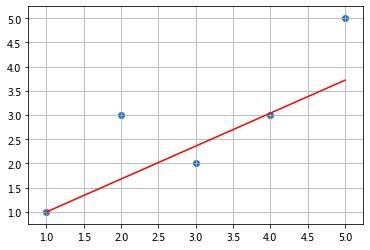

In [48]:
# best k is 0.68, best b is 0.32, and the loss is 0.5999999999999999
k,b = 0.68,0.32
y_hat = k*x + b
plt.plot(x,y_hat,color='red') # 绘制 x 与 y，color='red'设置颜色
plt.scatter(x,y)
plt.grid() # 显示网格

### 2.1.2 方法2，如何找到改变的方向呢？

In [54]:

direction  = [
    (+1, -1), # 第一个是k的方向，第二个b的方向，+1表示增大，-1表示减小
    (+1, +1),
    (-1, -1),
    (-1, +1),
]



<img src="https://img-blog.csdnimg.cn/20200412140525549.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="800" height="800" align="bottom" />

## 2.2 梯度下降(Gradient Descent)

Hypothesis (拟合的直线) ： $ \hat y = k\cdot x + b $    

Parameters (参数) ： $k,b$   

Cost Func (损失函数，loss选择MSE) ：  $ Cost(k,b) =  \frac {1}{2m}\sum_{i=1}^m ( \hat {y^i} - y^i )^2 $   

Goal ：$\min_{k,b}Cost(k,b)$   

- 首先对 $k$、$b$ 赋值，这个值可以是随机的，也可以是一个零向量；  
- 改变 $k$、$b$ 的值，使得 $ Cost(k,b) $ 按梯度下降的方向进行减少；  
- 当 $ Cost(k,b) $  下降到无法下降时为止.

$$ temp0 = k - \lambda \frac{\partial }{\partial k} Cost(k,b) $$

$$ temp1 = b - \lambda \frac{\partial }{\partial b} Cost(k,b) $$

$$ k := temp0 $$

$$ b := temp1 $$

$ \lambda $ 是步长，也被成为学习率，凭经验值。  

$ \frac{\partial }{\partial k} Cost(k,b) ,\frac{\partial }{\partial b} Cost(k,b)$ 是多少呢？

$$ \frac{\partial }{\partial k} Cost(k,b) = \frac {1}{m}\sum_{i=1}^m (\hat {y^i} - y^i ) x $$ 

$$ \frac{\partial }{\partial b} Cost(k,b) = \frac {1}{m}\sum_{i=1}^m (\hat {y^i} - y^i) $$ 

In [55]:
def loss(y, y_hat):
    return sum((y_hat_i - y_i)**2 for y_hat_i, y_i in zip(list(y_hat),list(y))) / len(list(y_hat))

In [56]:
def gradient_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_hat_i - y_i) * x_i
    return gradient / n


In [57]:
def gradient_b(y,y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_hat_i - y_i) 
    return gradient / n

- ### 演示
```python
current_k = current_k - learn_rate * k_gradient
current_b = current_b - learn_rate * b_gradient
```

In [60]:
min_loss = float("inf") # 正无穷或负无穷，使用float("inf")或float("-inf")来表示
best_k,best_b = None,None  # 空值
current_k, current_b = 10, 10
try_times = 1000
learn_rate = 0.1
for i in range(try_times):
    
    y_hat = [function(x_i,current_k,current_b) for x_i in list(x)]
    current_loss = loss(y,y_hat)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k,best_b = current_k, current_b
    else:
        k_gradient = gradient_k(x,y,y_hat)
        b_gradient = gradient_b(y,y_hat)
        current_k = current_k - learn_rate * k_gradient
        current_b = current_b - learn_rate * b_gradient
        best_k,best_b = current_k, current_b
print("best k is {}, best b is {}, and the loss is {}".format(best_k, best_b, current_loss))

best k is 0.7996398909330126, best b is 0.40130010799381305, and the loss is 0.4800003183324043


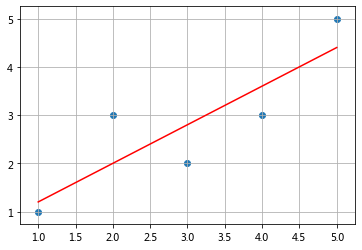

In [61]:
# best k is 0.80, best b is 0.40, and the loss is 0.48
k,b = 0.80,0.40
y_hat = k*x + b
plt.plot(x,y_hat,color='red') # 绘制 x 与 y，color='red'设置颜色
plt.scatter(x,y)
plt.grid() # 显示网格

 # 3 线性回归(Linear Regression) 
 ## 3.1 Extension-Multiple Variables

<img src="https://img-blog.csdnimg.cn/20200413143328240.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_left" alt="图片替换文本" width="500" height="500" align="bottom" />



<img src="https://img-blog.csdnimg.cn/20200413143817359.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_left" alt="图片替换文本" width="700" height="600" align="bottom" />

# 4 过拟合(Overfitting) 和 欠拟合(Underfitting)

![在这里插入图片描述](https://img-blog.csdnimg.cn/20200412172241826.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70)

## 4.1 why？

## 4.2 Bias and Variance
<img src="https://img-blog.csdnimg.cn/20200413123053887.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="500" height="500" align="bottom" />

<img src="https://img-blog.csdnimg.cn/20200413131243813.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="500" height="500" align="bottom" />

## 4.3 How to detect Overfitting?
> ### 4.3.1 数据集划分

<img src="https://img-blog.csdnimg.cn/20200412182252554.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="600" height="400" align="bottom" />

![在这里插入图片描述](https://img-blog.csdnimg.cn/20200413132215734.jpeg#pic_center)


> ### 4.3.2 正则化(Regularlization)

 >> $ R(k) $ 刻画模型的复杂程度
  $$ Cost(k,b) +  \lambda R(k) $$


 >> L1 正则化： 
  $$ R(k) = \left \|  k \right \|_1 = \sum_i |k_i|$$

 >> L2 正则化： 
$$ R(k) = \left \|  k \right \|_2^2 = \sum_i |k_i^2|$$

## 4.4 如何评价？


<img src="https://img-blog.csdnimg.cn/20200413103828575.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="700" height="600" align="bottom" />

$$ Accuracy = \frac{TP+TN}{TP+FP+TN+FN}  $$   

$$ Precision = \frac{TP}{(TP+FP)}  $$

$$ Recall = \frac{TP}{TP+FN} $$
 
$$ F1_{score} = \frac{2\times Recall\times Precision}{Recall + Precision} $$

## 4.5 Classes

<img src="https://img-blog.csdnimg.cn/20200413152008202.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="600" height="600" align="bottom" />



# 5 Logistic Function and Sigmoid Function

<img src="https://img-blog.csdnimg.cn/20200413152402793.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="600" height="600" align="bottom" />

In [62]:
def hypothesis(X, theta):
    z = X.dot(theta)
    g = 1/(1+np.e**-z)
    return g

# 6 逻辑回归(Logistic Regression)
![在这里插入图片描述](https://img-blog.csdnimg.cn/2020041315514144.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center)

In [63]:
# 代价函数和梯度
def costFunction(theta, X, y):
    h = hypothesis(X,theta)
    J = 1.0/m*(-y.T.dot(log(h)) - (1-y).T.dot(log(1-h)))
    grad = 1.0/m*X.T.dot(h-y)
    return J, grad

> 信用卡反欺诈检测实战----判断客户交易记录是否正常    

> 银行提供了一份个人交易记录，考虑到数据比较私密，不清楚大部分数据是什么，仅知道Amount列表示贷款的金额，Class列表示分类结果，若Class为0代表该条交易记录正常，若Class为1代表交易异常。    
  数据已经做了处理，分出了训练集和测试集，且平衡了两个类别下的数据量。   
  该实战的目的是希望学生掌握读取数据、逻辑回归建模、模型参数调优、模型评价。   

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:

X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)

X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

X_train.head() # 前五行数据展示

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
6870,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,-6.999907,...,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,-0.349231
152015,-0.425454,1.226245,-1.314904,0.775567,2.264370,-0.768401,1.371214,-0.326371,0.816325,-1.715394,...,-0.229286,-0.210073,-0.280529,-0.351881,-0.098883,0.411762,-0.588556,-0.046577,0.089299,-0.133335
261556,2.030930,-0.866155,-0.228221,-0.428373,-1.155582,-0.474754,-0.873382,-0.039503,-0.415414,0.946528,...,-0.500968,-0.546578,-1.040354,0.497881,0.044952,-0.780473,0.204253,-0.015302,-0.043013,-0.245321
214775,-0.395582,-0.751792,-1.984666,-0.203459,1.903967,-1.430289,-0.076548,-0.992260,0.756307,0.217630,...,-1.027716,1.377515,2.151787,0.189225,0.772943,-0.872443,-0.200612,0.356856,0.032113,-0.350471
149145,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,0.369936,...,-2.140874,10.005998,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,-0.325283


 > 原始数据为个人交易记录，该数据集总共有29列，其中数据特征有30列，Time列暂时不考虑，Amount列表示贷款的金额.

In [66]:
y_train.head()

,Class
6870,1
152015,0
261556,0
214775,1
149145,1


> Class为0代表该条交易记录正常，Class为1代表交易异常。

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score # Recall = TP/(TP+FN)
from sklearn.model_selection import KFold, cross_val_score


In [68]:
print(help(KFold))

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  KFold(n_splits=5, shuffle=False, random_state=None)
 |  
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=5
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.22
 |          ``n_splits`` default value changed from 3 to 5.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instanc

In [70]:
def Kfold_get_best_c(x_train_data,y_train_data):

    fold = KFold(5,shuffle=False)  # k-fold 表示K折的交叉验证
    # 这里会得到两个索引集合: 训练集 = indices[0], 验证集 = indices[1]
    
    c_param_range = [0.01,0.1,1,10,100]  # 定义不同的正则化惩罚力度
    
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    j = 0
    # 循环遍历不同的参数
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('正则化惩罚力度: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        
        
        for iteration, indices in enumerate(fold.split(x_train_data)):

            # 逻辑回归，并且给定参数,L1正则
            lr = LogisticRegression(C = c_param, penalty = 'l1',solver='liblinear')

            # 训练模型，注意索引不要给错了，训练的时候一定传入的是训练集，所以X和Y的索引都是0
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
   
            # 建立好模型后，预测模型结果，这里用的就是验证集，索引为1
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # 有了预测结果之后就可以来进行评估了，这里recall_score需要传入预测值和真实值。
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            # 一会还要算平均，先把每一步的结果都先保存起来。
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': 召回率 = ', recall_acc)

        
        # 当执行完所有的交叉验证后，计算平均结果
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')
        
    #找到最好的参数，哪一个Recall高，自然就是最好的了。
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    
    # 打印最好的结果
    print('*********************************************************************************')
    print('效果最好的模型所选参数 = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [72]:
# 交叉验证得到不同参数结果
best_c = Kfold_get_best_c(X_train,y_train)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.9315068493150684
Iteration  1 : 召回率 =  0.9178082191780822
Iteration  2 : 召回率 =  1.0
Iteration  3 : 召回率 =  0.9594594594594594
Iteration  4 : 召回率 =  0.9696969696969697

平均召回率  0.955694299529916

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.8356164383561644
Iteration  1 : 召回率 =  0.863013698630137
Iteration  2 : 召回率 =  0.9152542372881356
Iteration  3 : 召回率 =  0.9459459459459459
Iteration  4 : 召回率 =  0.8787878787878788

平均召回率  0.8877236398016523

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.863013698630137
Iteration  1 : 召回率 =  0.863013698630137
Iteration  2 : 召回率 =  0.9491525423728814
Iteration  3 : 召回率 =  0.9459459459459459
Iteration  4 : 召回率 =  0.8939393939393939

平均召回率  0.9030130559036991

------------

In [73]:
LR = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR_recall = recall_score(y_test,y_pred)
print('召回率：',LR_recall)

召回率： 0.9319727891156463


/Users/edz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
# 没有加L1正则化
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
recall = recall_score(y_test,y_pred)
print('召回率：',recall)

召回率： 0.9115646258503401


/Users/edz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 7 神经网络(Neural Network)
## 7.1  Why Need NN?
>  Non Linear

<img src="https://img-blog.csdnimg.cn/20200414104406949.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="600" height="600" align="bottom" />

>  Mimic Brain

<img src="https://img-blog.csdnimg.cn/20200414105454130.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="600" height="600" align="bottom" />

## 7.2 Logistic Unit And Neural Network
<img src="https://img-blog.csdnimg.cn/20200414112153267.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="600" height="600" align="bottom" />



## 7.3 Activation Function
![](./激活函数.png)

## 7.4 Back Propagation 
<img src="https://img-blog.csdnimg.cn/20200415162406262.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="600" height="600" align="bottom" />

<img src="https://img-blog.csdnimg.cn/20200415162638161.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="600" height="500" align="bottom" />

In [75]:
import numpy as np


class Node:
    def __init__(self, inputs=[]):
        self.inputs = inputs
        self.outputs = []

        for n in self.inputs:
            n.outputs.append(self)
            # set 'self' node as inbound_nodes's outbound_nodes

        self.value = None

        self.gradients = {}
        # keys are the inputs to this node, and their
        # values are the partials of this node with 
        # respect to that input.
        # \partial{node}{input_i}
        

    def forward(self):
        '''
        Forward propagation. 
        Compute the output value vased on 'inbound_nodes' and store the 
        result in self.value
        '''

        raise NotImplemented
    

    def backward(self):

        raise NotImplemented
        
class Input(Node):
    def __init__(self):
        '''
        An Input node has no inbound nodes.
        So no need to pass anything to the Node instantiator.
        '''
        Node.__init__(self)

    def forward(self, value=None):
        '''
        Only input node is the node where the value may be passed
        as an argument to forward().
        All other node implementations should get the value of the 
        previous node from self.inbound_nodes
        
        Example: 
        val0: self.inbound_nodes[0].value
        '''
        if value is not None:
            self.value = value
            ## It's is input node, when need to forward, this node initiate self's value.

        # Input subclass just holds a value, such as a data feature or a model parameter(weight/bias)
        
    def backward(self):
        self.gradients = {self:0}
        for n in self.outputs:
            grad_cost = n.gradients[self]
            self.gradients[self] = grad_cost * 1
            
        
        # input N --> N1, N2
        # \partial L / \partial N 
        # ==> \partial L / \partial N1 * \ partial N1 / \partial N


class Add(Node):
    def __init__(self, *nodes):
        Node.__init__(self, nodes)


    def forward(self):
        self.value = sum(map(lambda n: n.value, self.inputs))
        ## when execute forward, this node caculate value as defined.

class Linear(Node):
    def __init__(self, nodes, weights, bias):
        Node.__init__(self, [nodes, weights, bias])

    def forward(self):
        inputs = self.inputs[0].value
        weights = self.inputs[1].value
        bias = self.inputs[2].value

        self.value = np.dot(inputs, weights) + bias
        
    def backward(self):

        # initial a partial for each of the inbound_nodes.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            # Get the partial of the cost w.r.t this node.
            grad_cost = n.gradients[self]

            self.gradients[self.inputs[0]] = np.dot(grad_cost, self.inputs[1].value.T)
            self.gradients[self.inputs[1]] = np.dot(self.inputs[0].value.T, grad_cost)
            self.gradients[self.inputs[2]] = np.sum(grad_cost, axis=0, keepdims=False)

        # WX + B / W ==> X
        # WX + B / X ==> W

class Sigmoid(Node):
    def __init__(self, node):
        Node.__init__(self, [node])


    def _sigmoid(self, x):
        return 1./(1 + np.exp(-1 * x))

    def forward(self):
        self.x = self.inputs[0].value
        self.value = self._sigmoid(self.x)

    def backward(self):
        self.partial = self._sigmoid(self.x) * (1 - self._sigmoid(self.x))
        
        # y = 1 / (1 + e^-x)
        # y' = 1 / (1 + e^-x) (1 - 1 / (1 + e^-x))
        
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            grad_cost = n.gradients[self]  # Get the partial of the cost with respect to this node.

            self.gradients[self.inputs[0]] = grad_cost * self.partial
            # use * to keep all the dimension same!.



class MSE(Node):
    def __init__(self, y, a):
        Node.__init__(self, [y, a])


    def forward(self):
        y = self.inputs[0].value.reshape(-1, 1)
        a = self.inputs[1].value.reshape(-1, 1)
        assert(y.shape == a.shape)

        self.m = self.inputs[0].value.shape[0]
        self.diff = y - a

        self.value = np.mean(self.diff**2)


    def backward(self):
        self.gradients[self.inputs[0]] = (2 / self.m) * self.diff
        self.gradients[self.inputs[1]] = (-2 / self.m) * self.diff


def forward_and_backward(outputnode, graph):
    # execute all the forward method of sorted_nodes.

    ## In practice, it's common to feed in mutiple data example in each forward pass rather than just 1. 
    ## Because the examples can be processed in parallel. The number of examples is called batch size.
    for n in graph:
        n.forward()
        ## each node execute forward, get self.value based on the topological sort result.

    for n in  graph[::-1]:
        n.backward()

    #return outputnode.value

###   v -->  a -->  C
##    b --> C
##    b --> v -- a --> C
##    v --> v ---> a -- > C

def topological_sort(feed_dict):
    """
    Sort generic nodes in topological order using Kahn's Algorithm.
    `feed_dict`: A dictionary where the key is a `Input` node and the value is the respective value feed to that node.
    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outputs:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]
            ## if n is Input Node, set n'value as 
            ## feed_dict[n]
            ## else, n's value is caculate as its
            ## inbounds

        L.append(n)
        for m in n.outputs:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def sgd_update(trainables, learning_rate=1e-2):
    # there are so many other update / optimization methods
    # such as Adam, Mom, 
    for t in trainables:
        t.value += -1 * learning_rate * t.gradients[t]

In [76]:
from sklearn.datasets import load_boston
data = load_boston()
losses = []

"""
Check out the new network architecture and dataset!
Notice that the weights and biases are
generated randomly.
No need to change anything, but feel free to tweak
to test your network, play around with the epochs, batch size, etc!
"""

import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample


# Load data
data = load_boston()
X_ = data['data']
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Input(), Input()
W1, b1 = Input(), Input()
W2, b2 = Input(), Input()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 5000
# Total number of examples
m = X_.shape[0]
batch_size = 16
steps_per_epoch = m // batch_size

graph = topological_sort(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))

# Step 4
for i in range(epochs):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
        _ = None
        forward_and_backward(_, graph) # set output node not important.

        # Step 3
        rate = 1e-2
    
        sgd_update(trainables, rate)

        loss += graph[-1].value
    
    if i % 100 == 0: 
        print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))
        losses.append(loss)

Total number of examples = 506
Epoch: 1, Loss: 170.474
Epoch: 101, Loss: 6.181
Epoch: 201, Loss: 5.384
Epoch: 301, Loss: 5.605
Epoch: 401, Loss: 5.069
Epoch: 501, Loss: 4.489
Epoch: 601, Loss: 3.337
Epoch: 701, Loss: 4.082
Epoch: 801, Loss: 3.838
Epoch: 901, Loss: 3.012
Epoch: 1001, Loss: 3.951
Epoch: 1101, Loss: 2.961
Epoch: 1201, Loss: 2.855
Epoch: 1301, Loss: 3.913
Epoch: 1401, Loss: 3.797
Epoch: 1501, Loss: 3.387
Epoch: 1601, Loss: 3.078
Epoch: 1701, Loss: 3.845
Epoch: 1801, Loss: 3.174
Epoch: 1901, Loss: 2.797
Epoch: 2001, Loss: 3.403
Epoch: 2101, Loss: 3.517
Epoch: 2201, Loss: 3.167
Epoch: 2301, Loss: 3.393
Epoch: 2401, Loss: 2.931
Epoch: 2501, Loss: 3.079
Epoch: 2601, Loss: 3.308
Epoch: 2701, Loss: 2.888
Epoch: 2801, Loss: 3.538
Epoch: 2901, Loss: 3.323
Epoch: 3001, Loss: 3.145
Epoch: 3101, Loss: 2.786
Epoch: 3201, Loss: 3.296
Epoch: 3301, Loss: 3.394
Epoch: 3401, Loss: 2.945
Epoch: 3501, Loss: 3.096
Epoch: 3601, Loss: 3.405
Epoch: 3701, Loss: 2.821
Epoch: 3801, Loss: 3.027
Epoc

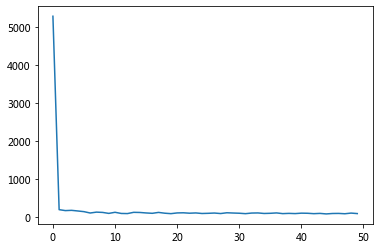

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(losses)), losses)

# 8 Optimizer Adam
## 8.1 SGD + Momentum

![](./SGD.png)

## 8.2 AdaGrad

![](./AdaGrad.png)

## 8.3 RMSProp

![](RMSProp.png)

## 8.4 Adam

![](Adam.png)

### 测试机器学习问题比较好的默认参数设定为：

alpha=0.001、beta1=0.9、beta2=0.999 和 epsilon=10E−8。

### 常用框架默认参数设定
TensorFlow：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08.

Keras：lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0.

Blocks：learning_rate=0.002, beta1=0.9, beta2=0.999, epsilon=1e-08, decay_factor=1.

Lasagne：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08

Caffe：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08

MxNet：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8

Torch：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8

## Adam 实现

In [82]:
import sys
print(sys.version)
import autograd.numpy as np
from autograd import grad

EPOCHS = 1000

class Adam:
    def __init__(self, loss, weights, lr=0.001, beta1=0.9, beta2=0.999, epislon=1e-8):
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epislon = epislon
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        self.t = 0
    def minimize_raw(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.m_cat = self.m / (1 - self.beta1 ** self.t)
        self.v_cat = self.v / (1 - self.beta2 ** self.t)
        self.theta -= self.lr * self.m_cat / (self.v_cat ** 0.5 + self.epislon)

    def minimize(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)
        
        
    def minimize_show(self, epochs=5000):
        for _ in range(epochs):
            self.t += 1
            g = self.get_gradient(self.theta)
            lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
            self.m = self.beta1 * self.m + (1 - self.beta1) * g
            self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
            self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)
            print("step{: 4d} g:{} lr:{} m:{} v:{} theta:{}".format(self.t, g, lr, self.m, self.v, self.theta))
            final_loss = self.loss(self.theta)
            print("final loss:{} weights:{}".format(final_loss, self.theta))

def sigmoid(x):
    return 0.5*(np.tanh(x) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])
weights = np.array([0.0, 0.0, 0.0])

def sgd(epochs=1000):
    training_gradient_fun = grad(training_loss)
    
    # Optimize weights using gradient descent.
    weights = np.array([0.0, 0.0, 0.0])
    print("Initial loss:{}".format(training_loss(weights)))
    
    for i in range(epochs):
        weights -= training_gradient_fun(weights) * 0.01

    print("Trained loss:{}".format(training_loss(weights)))
    print("weights:{}".format(weights))
    
if __name__ == "__main__":

    adam = Adam(training_loss, weights, lr=0.01)
    print("start to optimize:")
    # adam.minimize_show(epochs=EPOCHS)

    for i in range(EPOCHS):
        adam.minimize_raw()
    print("weights:{} loss:{}".format(adam.theta, adam.loss(adam.theta)))    

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
start to optimize:
weights:[ 1.85660145 -0.36412288  2.44143684] loss:0.02741367962460835


# 9 深度学习框架
## 9.1 Tensorflow
请学生自行安装tensorflow 2.0版本，没有安装的同学，可以在cell中运行【! pip install tensorflow==2.0.0b1】。  
同学，你可以自行阅读[tensorflow 2.0 中文文档](http://www.tensorfly.cn/tfdoc/get_started/basic_usage.html)    
**更建议同学直接阅读**[英文文档](https://tensorflow.google.cn/tutorials/quickstart/beginner)

In [86]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

model.add(Dense(units=64, activation='sigmoid', input_dim=13))
model.add(Dense(units=30, activation='sigmoid', input_dim=64))
model.add(Dense(units=1))

model.compile(loss='mse',
              optimizer='sgd',
              metrics=['mse'])

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [4]:
model.fit(X_, y_, epochs=1000, batch_size=32)

NameError: name 'model' is not defined